In [1]:

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load datasets
daily_activity = pd.read_csv('dailyActivity_merged.csv')
sleep_day = pd.read_csv('sleepDay_merged.csv')
hourly_steps = pd.read_csv('hourlySteps_merged.csv')
hourly_calories = pd.read_csv('hourlyCalories_merged.csv')

In [3]:
# Rename Pandas columns to lower case
daily_activity.columns = daily_activity.columns.str.lower()
sleep_day.columns = sleep_day.columns.str.lower()
hourly_steps.columns = hourly_steps.columns.str.lower()
hourly_calories.columns = hourly_calories.columns.str.lower()


## Examine the data

In [4]:

daily_activity.head()

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
sleep_day.head()

,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [6]:

hourly_steps.head()

,id,activityhour,steptotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [7]:

hourly_calories.head()

,id,activityhour,calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


## Overview of all variables, their datatypes

In [8]:

daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        940 non-null    int64  
 1   activitydate              940 non-null    object 
 2   totalsteps                940 non-null    int64  
 3   totaldistance             940 non-null    float64
 4   trackerdistance           940 non-null    float64
 5   loggedactivitiesdistance  940 non-null    float64
 6   veryactivedistance        940 non-null    float64
 7   moderatelyactivedistance  940 non-null    float64
 8   lightactivedistance       940 non-null    float64
 9   sedentaryactivedistance   940 non-null    float64
 10  veryactiveminutes         940 non-null    int64  
 11  fairlyactiveminutes       940 non-null    int64  
 12  lightlyactiveminutes      940 non-null    int64  
 13  sedentaryminutes          940 non-null    int64  
 14  calories  

In [9]:

sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  413 non-null    int64 
 1   sleepday            413 non-null    object
 2   totalsleeprecords   413 non-null    int64 
 3   totalminutesasleep  413 non-null    int64 
 4   totaltimeinbed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [10]:

hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            22099 non-null  int64 
 1   activityhour  22099 non-null  object
 2   steptotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [11]:

hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            22099 non-null  int64 
 1   activityhour  22099 non-null  object
 2   calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


## Changing date strings to datetime

In [12]:

daily_activity['activitydate'] = pd.to_datetime(daily_activity['activitydate'])
sleep_day['sleepday'] = pd.to_datetime(sleep_day['sleepday'])
hourly_steps['time'] = pd.to_datetime(hourly_steps['activityhour'])
hourly_calories['time'] = pd.to_datetime(hourly_calories['activityhour'])

#### Now we will use Series.dt.day_name() function to return the names of the day of each timestamp in the given series object.

In [13]:

daily_activity['dayofweek'] = daily_activity['activitydate'].dt.day_name()

#### Delete the activityhour column

In [14]:
hourly_steps.drop(['activityhour'], axis = 1, inplace = True)
hourly_calories.drop(['activityhour'], axis = 1, inplace = True)


#### Rename columns

In [15]:
daily_activity.rename(columns = {'activitydate': 'date'}, inplace = True)
sleep_day.rename(columns = {'sleepday': 'date'}, inplace = True)

## Examine the data

In [16]:

daily_activity['id'].nunique()

33

In [17]:

sleep_day['id'].nunique()

24

In [18]:

hourly_steps['id'].nunique()

33

In [19]:

hourly_calories['id'].nunique()

33

#### From the above observation, noted that
#### There are 33 unique IDs, instead of 30 unique IDs as expected from 30 fitness tracker users.

#### Only 24 runners have submitted their daily sleep.


### The total days of smart devices usage by user and average number of days that all runners tracked their activity are, respectively:

In [20]:
starting_date_and_an_ending_date = daily_activity.groupby('id').agg(minimum_date = ('date', np.min), maximum_date = ('date', np.max)).reset_index()

### Total days of smart devices usage by user

In [21]:
starting_date_and_an_ending_date['usage_days'] = starting_date_and_an_ending_date['maximum_date'] - starting_date_and_an_ending_date['minimum_date']

In [22]:

starting_date_and_an_ending_date[['id', 'usage_days']]

,id,usage_days
0,1503960366,30 days
1,1624580081,30 days
2,1644430081,29 days
3,1844505072,30 days
4,1927972279,30 days
5,2022484408,30 days
6,2026352035,30 days
7,2320127002,30 days
8,2347167796,17 days
9,2873212765,30 days



### Average number of days that all runners tracked their activity

In [23]:
print(starting_date_and_an_ending_date['usage_days'].mean().days)

27


## The Average of Total Steps
### Summary statistics

In [24]:
daily_activity[['totalsteps']].describe()

,totalsteps
count,940.000000
mean,7637.910638
std,5087.150742
min,0.000000
25%,3789.750000
50%,7405.500000
75%,10727.000000
max,36019.000000


#### As we can see, the average of total daily steps by the users is 7,638 steps. According to a study conducted in 2011 by BMC/BioMed Central, taking 10,000 steps a day is a reasonable target for healthy adults, helping reduce certain health conditions, such as high blood pressure and heart disease. To help users achieve the recommended number of steps, alarms or notifications can be triggered via the smart device. These reminders can encourage users to clock in more steps throughout the day.

### Frequency of Usage Across the Week

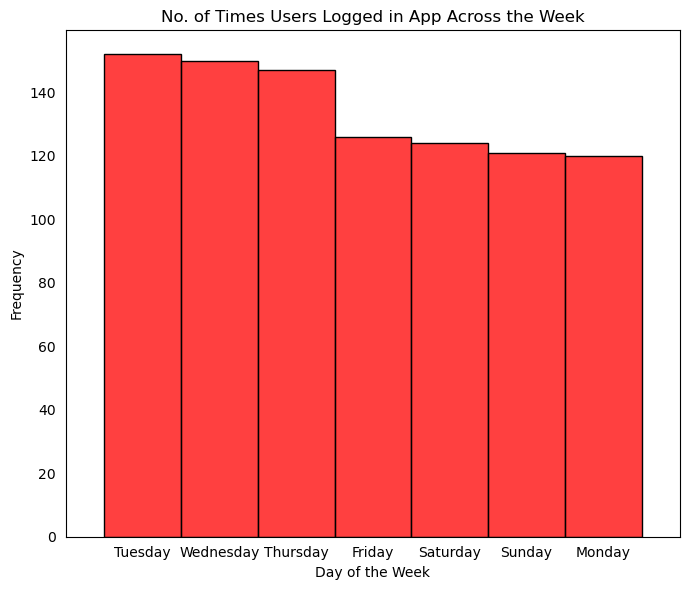

In [70]:
plt.style.use('default')
plt.figure(figsize = (7, 6), tight_layout = True)

ax = sns.histplot(daily_activity['dayofweek'], bins = np.arange(8) - 0.5, edgecolor = 'black',  color='red',linewidth = 1)
ax.set(title = 'No. of Times Users Logged in App Across the Week', xlabel = 'Day of the Week', ylabel = 'Frequency')

plt.tick_params(left = False, bottom = False)
plt.xticks(range(7))
plt.xlim([-1, 7])
plt.show()

#### In the above histogram we can determine the following:

- We discovered that users prefer or remember to track their activity on the app during midweek from Tuesday to Thursday.

- Noting that the frequency dropped on Friday and continue on weekends and Monday.

- Adding feature of reminding consumer to wear the tracker in case of no-use may attract consumers who often forget to put on the gadget.

- Rewards-program to incentivize consistent users may encourage regular use of Bellabeat app.

- On weekends, Bellabeat app can also prompt notification to encourage users to exercise.

### Percentage of Activity in Minutes

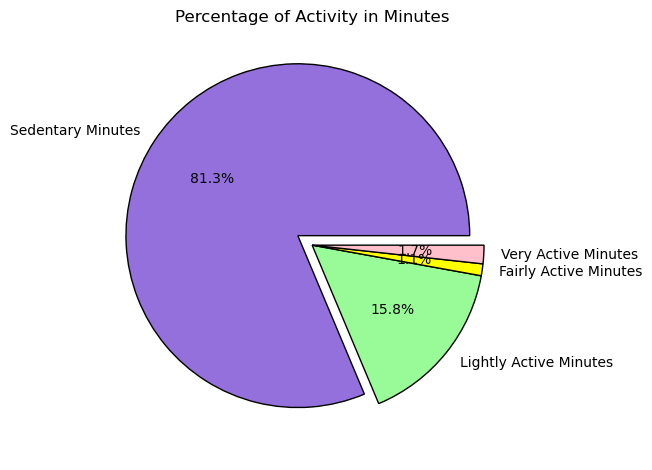

In [26]:
sedentary_minutes = daily_activity['sedentaryminutes'].sum()
lightly_active_minutes = daily_activity['lightlyactiveminutes'].sum()
fairly_active_minutes = daily_activity['fairlyactiveminutes'].sum()
very_active_minutes = daily_activity['veryactiveminutes'].sum()

slices = [sedentary_minutes, lightly_active_minutes, fairly_active_minutes, very_active_minutes]
labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes']
colours = ['mediumpurple', 'palegreen', 'yellow', 'pink']
explode = [0.1, 0, 0, 0]

plt.pie(slices, labels = labels, colors = colours, wedgeprops = {'edgecolor': 'black'}, explode = explode, autopct = '%1.1f%%')
plt.title('Percentage of Activity in Minutes')
plt.tight_layout()
plt.show()

#### As seen from the pie chart,

- Sedentary minutes takes the biggest slice at 81.3%.

- This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.

- App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

- The CDC recommends working out with a friend in order to feel more motivated, be more adventurous in trying workouts, and to become consistent. The CDC even recommends the use of a social media workout app to connect with friends and reach your goals. The Bellabeat app could become that social media workout app that women turn to, by creating a sisterhood of supportive women ready to prioritize their health.

### Average Steps per Hour

In [59]:
hourly_steps_and_calories_merged_data = pd.merge(hourly_steps, hourly_calories, on = ['id', 'time'])
hourly_steps_and_calories_merged_data 

,id,steptotal,time,calories
0,1503960366,373,2016-04-12 00:00:00,81
1,1503960366,160,2016-04-12 01:00:00,61
2,1503960366,151,2016-04-12 02:00:00,59
3,1503960366,0,2016-04-12 03:00:00,47
4,1503960366,0,2016-04-12 04:00:00,48
...,...,...,...,...
22094,8877689391,514,2016-05-12 10:00:00,126
22095,8877689391,1407,2016-05-12 11:00:00,192
22096,8877689391,3135,2016-05-12 12:00:00,321
22097,8877689391,307,2016-05-12 13:00:00,101


In [60]:
hourly_steps_and_calories_merged_data['time'] = pd.to_datetime(hourly_steps_and_calories_merged_data['time']).dt.time
hourly_steps_and_calories_merged_data['time'] 

0        00:00:00
1        01:00:00
2        02:00:00
3        03:00:00
4        04:00:00
           ...   
22094    10:00:00
22095    11:00:00
22096    12:00:00
22097    13:00:00
22098    14:00:00
Name: time, Length: 22099, dtype: object

In [61]:
average_total_steps = hourly_steps_and_calories_merged_data.groupby(['time'])['steptotal'].mean().reset_index()
average_total_steps

,time,steptotal
0,00:00:00,42.188437
1,01:00:00,23.102894
2,02:00:00,17.110397
3,03:00:00,6.426581
4,04:00:00,12.699571
5,05:00:00,43.869099
6,06:00:00,178.508056
7,07:00:00,306.049409
8,08:00:00,427.544576
9,09:00:00,433.301826


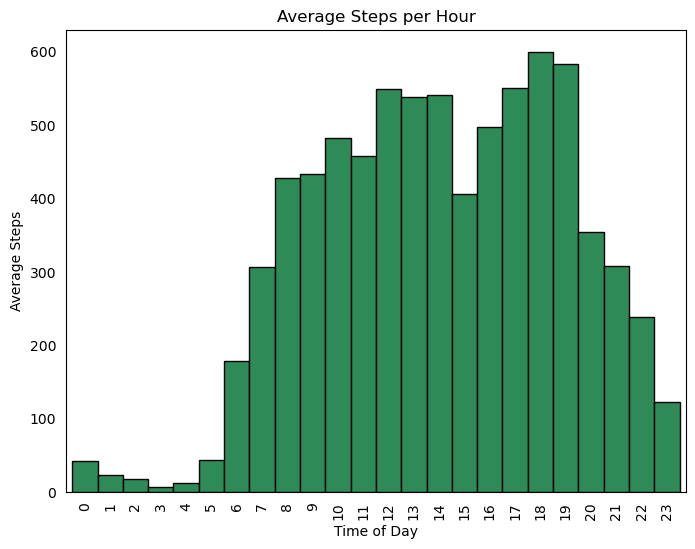

In [66]:

average_total_steps.plot.bar(figsize = (8, 6) , edgecolor = 'black', width = 1.0, title = 'Average Steps per Hour', xlabel = 'Time of Day', ylabel = 'Average Steps', color='seagreen',legend = False)

plt.tick_params(left = False, bottom = False)

#### Users takes the most steps from 5 PM to 7 PM. Bellabeat can use this time to remind and motivate users to go for a run or walk.

### Minutes Asleep vs. Total Steps

In [31]:
daily_activity_and_sleep_day_merged_data = daily_activity.merge(sleep_day, on = ['id', 'date'])

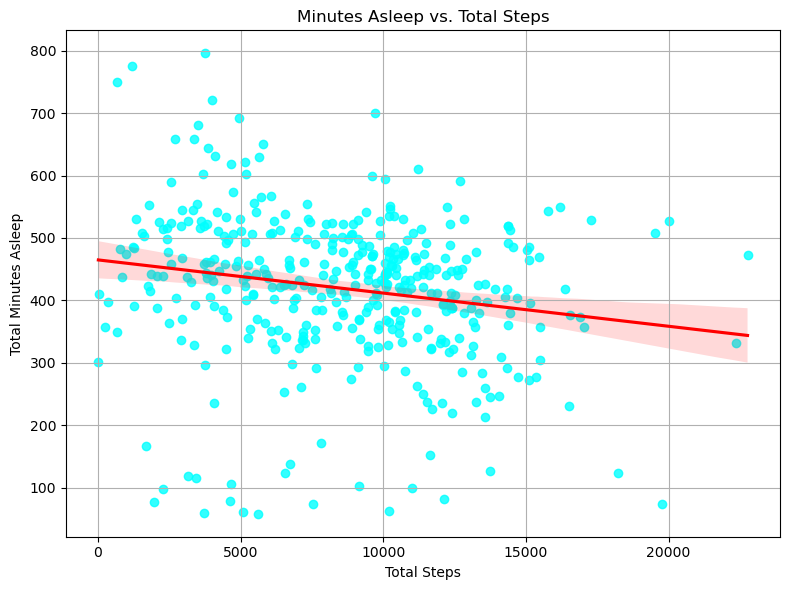

In [68]:

plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.regplot(x = 'totalsteps', y = 'totalminutesasleep', data = daily_activity_and_sleep_day_merged_data, scatter_kws = {'color': 'aqua'}, line_kws = {'color': 'red'})
ax.set(title = 'Minutes Asleep vs. Total Steps', xlabel = 'Total Steps', ylabel = 'Total Minutes Asleep')

plt.grid(True)
plt.show()

#### Users who move more through the day and tend to exercise longer, tend to sleep less. Therefore, Bellabeat could offer their customers reminders about upcoming sleep time or even relaxing playlists in order to get ready for bedtime.

### Active Minutes vs. Calories Burned

In [33]:
daily_activity['totalactiveminutes'] = daily_activity['lightlyactiveminutes'] + daily_activity['fairlyactiveminutes'] + daily_activity['veryactiveminutes']


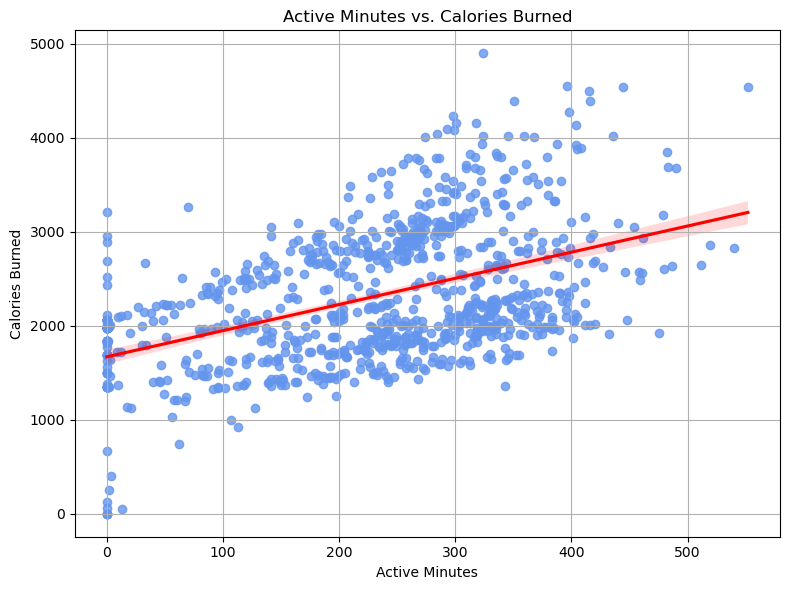

In [69]:
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.regplot(x = 'totalactiveminutes', y = 'calories', data = daily_activity, scatter_kws = {'color': 'cornflowerblue'}, line_kws = {'color': 'red'})
ax.set(title = 'Active Minutes vs. Calories Burned', xlabel = 'Active Minutes', ylabel = 'Calories Burned')

plt.grid(True)
plt.show()

#### From the scatter plot above, we can see that active minutes has a postive correlation with calories burned. Introducing different type of workout at all fitness levels, home workouts for those who work from home or simple 10 minutes short workout for those who have a very busy lifestyle to encourage users to stay active through their workweeks.